In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('/content/IMDb_Movies_India_clean.csv')

# Display the initial head of the dataframe to understand its structure
initial_head = df.head()

# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Print the initial head, missing values, and data types
print(initial_head)
print(missing_values)
print(data_types)

                                 Name    Year  Duration  \
0  #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
1                             #Yaaram  2019.0     110.0   
2                ...Aur Pyaar Ho Gaya  1997.0     147.0   
3                           ...Yahaan  2005.0     142.0   
4                  ?: A Question Mark  2012.0      82.0   

                       Genre  Rating   Votes        Director          Actor 1  \
0                      Drama     7.0     8.0   Gaurav Bakshi     Rasika Dugal   
1            Comedy, Romance     4.4    35.0      Ovais Khan          Prateik   
2     Comedy, Drama, Musical     4.7   827.0    Rahul Rawail       Bobby Deol   
3        Drama, Romance, War     7.4  1086.0  Shoojit Sircar  Jimmy Sheirgill   
4  Horror, Mystery, Thriller     5.6   326.0   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
0          Vivek Ghamande    Arvind Jangid  
1              Ishita Raj  Siddhant Kapoor  
2  Aishwarya Rai Bachch

In [ ]:
# Select relevant columns and drop NaN values
df = df[['Genre', 'Rating']].dropna()

In [ ]:
# Convert Genre (comma-separated string) into a list
df['Genre'] = df['Genre'].apply(lambda x: x.split(','))

In [ ]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

In [ ]:
final_df = pd.concat([genre_df, df[['Rating']]], axis=1)

In [ ]:
X = final_df.drop(columns=['Rating'])
y = final_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.7571374166693505
R² Score: 0.05109034917413546


In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Accuracy Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Model Performance:
✅ Mean Squared Error (MSE): 1.76
✅ R² Score: 0.0511


In [ ]:
def predict_rating(genre_list):
    genre_input = mlb.transform([genre_list])
    return model.predict(genre_input)[0]

In [ ]:
print("Predicted Rating for ['Action', 'Drama']:", predict_rating(['Action', 'Drama']))

Predicted Rating for ['Action', 'Drama']: 5.494557120746719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<ipython-input-41-aa1a64997206>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_avg_ratings.keys()), y=list(genre_avg_ratings.values()), palette='viridis')


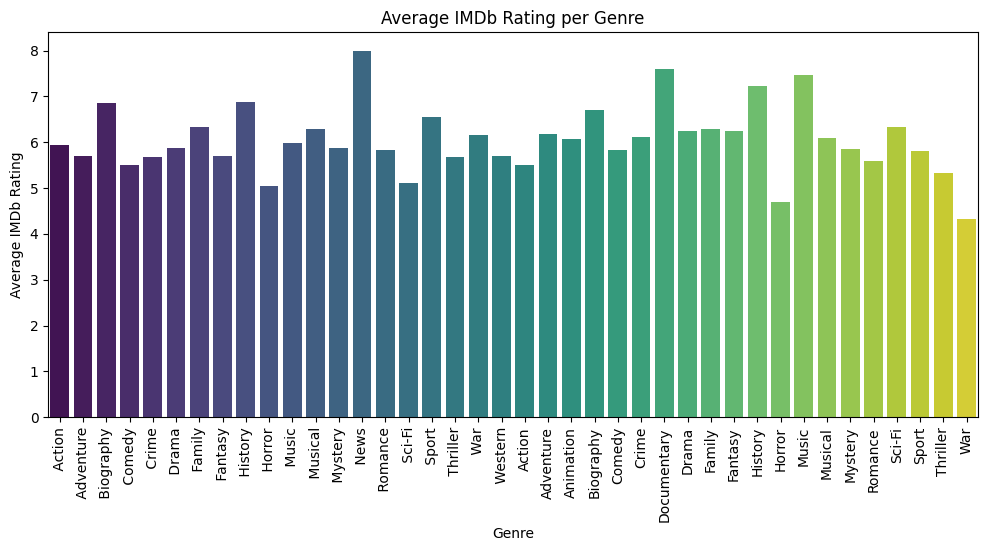

In [ ]:
genre_avg_ratings = {genre: df[df['Genre'].apply(lambda x: genre in x)]['Rating'].mean()
                     for genre in mlb.classes_}

plt.figure(figsize=(12, 5))
sns.barplot(x=list(genre_avg_ratings.keys()), y=list(genre_avg_ratings.values()), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating per Genre")
plt.show()

<ipython-input-42-a2ffe11fe6d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Rating", data=df_exploded, palette="coolwarm")


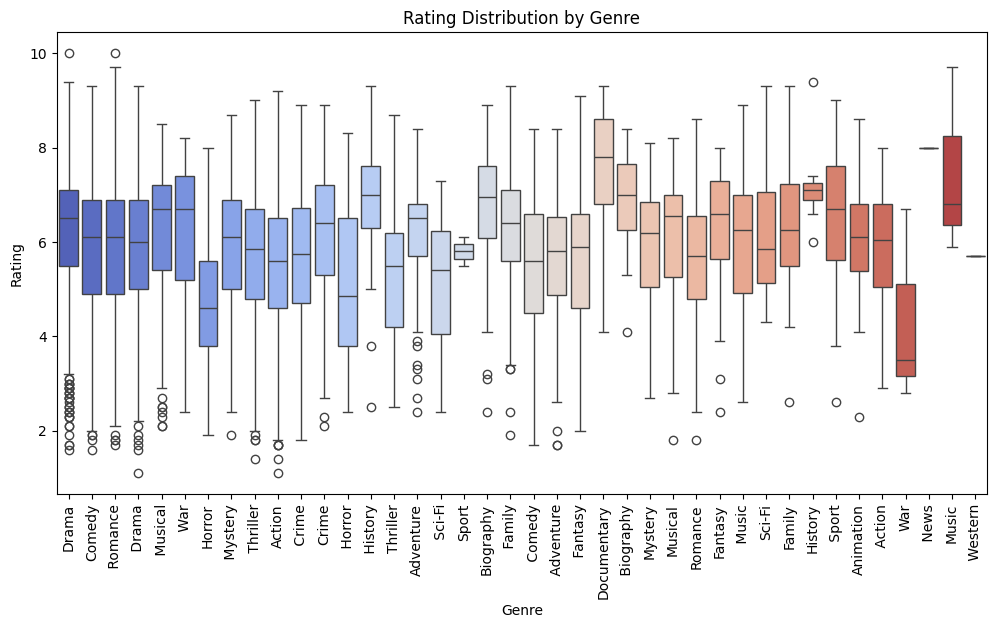

In [ ]:
plt.figure(figsize=(12, 6))
df_exploded = df.explode('Genre')  # Convert list of genres into separate rows
sns.boxplot(x="Genre", y="Rating", data=df_exploded, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Rating Distribution by Genre")
plt.show()

<ipython-input-43-2eb29c51cdf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Genre", y="Rating", data=df_exploded, jitter=True, alpha=0.5, palette="Set1")


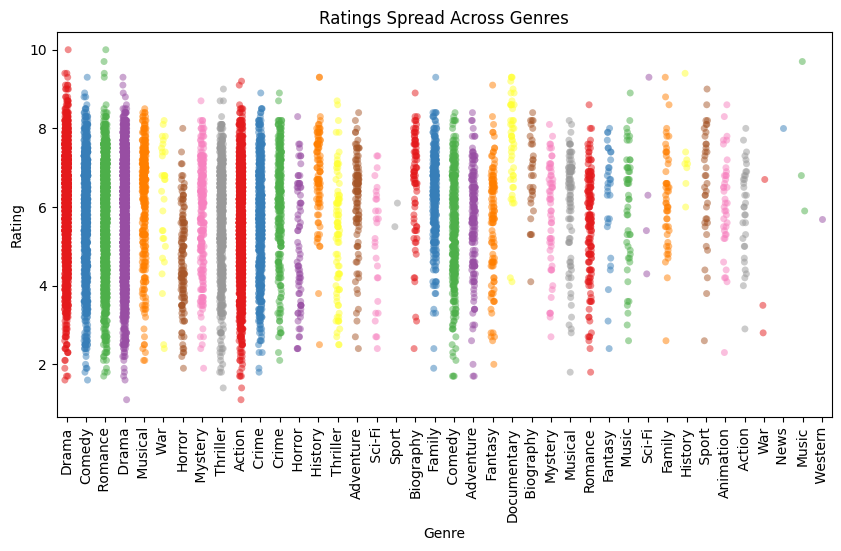

In [ ]:
plt.figure(figsize=(10, 5))
sns.stripplot(x="Genre", y="Rating", data=df_exploded, jitter=True, alpha=0.5, palette="Set1")
plt.xticks(rotation=90)
plt.title("Ratings Spread Across Genres")
plt.show()